In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
def wrangle(datapath):
    df=pd.read_csv(datapath)
    #drop unnecessray columns 
    df.drop(columns=['ID','Year_Birth','Education'],inplace=True)
    #change Income to data type float
    mask_ba = df['Income'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
    df['Income'] = mask_ba
    #drop null rows 
    df.dropna(inplace=True)
    return df
    

In [4]:
df=wrangle('marketing_data.csv')

In [4]:
df.head(5)

,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,...,6,1,0,0,0,0,0,1,0,SP
1,Single,57091.0,0,0,6/15/14,0,464,5,64,7,...,7,5,0,0,0,0,1,1,0,CA
2,Married,67267.0,0,1,5/13/14,0,134,11,59,15,...,5,2,0,0,0,0,0,0,0,US
3,Together,32474.0,1,1,5/11/14,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,AUS
4,Single,21474.0,1,0,4/8/14,0,6,16,24,11,...,2,7,1,0,0,0,0,1,0,SP


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marital_Status       2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Dt_Customer          2216 non-null   object 
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

In [76]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#which is the most purchased order?

k={
   'Name':['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],
    'values':[df['MntFruits'].sum(),df['MntMeatProducts'].sum(),df['MntFishProducts'].sum(),df['MntSweetProducts'].sum(),df['MntGoldProds'].sum()]
  }

In [43]:
k

{'Name': ['MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds'],
 'values': [58405, 370063, 83405, 59896, 97427]}

In [44]:
df1=pd.DataFrame(k)

In [45]:
df1=df1.set_index('Name')

Text(0, 0.5, 'Total Sales')

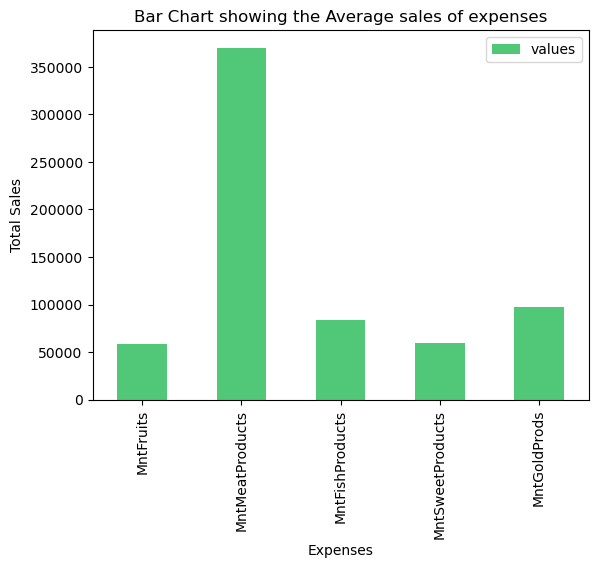

In [46]:
df1.plot(
    kind='bar',
    title='Bar Chart showing the Average sales of expenses',
    color='#50C878'
)
plt.xlabel('Expenses')
plt.ylabel('Total Sales')

### From above chart it is clearly shown that Meat products have the highest sales . And Fruits have lowest sales



In [17]:
k=df.select_dtypes(include=['float','int']).drop(columns=['Kidhome','Teenhome','Recency','Complain','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']).corr()

In [22]:
l=k['Income'].drop('Income')
l

MntWines               0.578650
MntFruits              0.430842
MntMeatProducts        0.584633
MntFishProducts        0.438871
MntSweetProducts       0.440744
MntGoldProds           0.325916
NumDealsPurchases     -0.083101
NumWebPurchases        0.387878
NumCatalogPurchases    0.589162
NumStorePurchases      0.529362
NumWebVisitsMonth     -0.553088
Name: Income, dtype: float64

<Axes: >

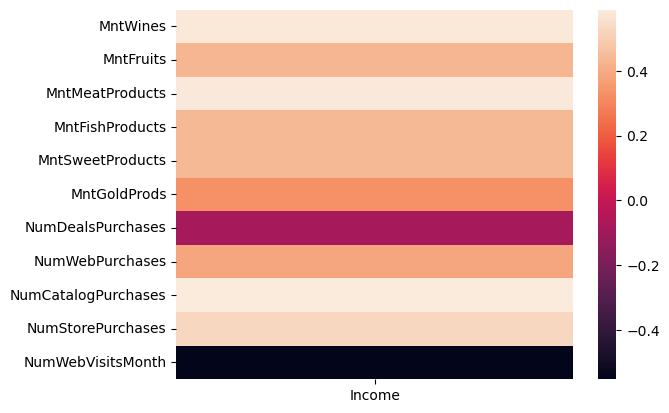

In [24]:
sns.heatmap(pd.DataFrame(l))

### So, Generally a person with high income spends more in products. BUT, it is also noticable that person with high income , Monthly website visits are less and also they spend less amounts in deals. This mean they prefer CatalogPurchase and StorePurchase more followed by Web purchases
### In reverse, Those who are with low income prefer Deals for discounts

In [47]:

k={
   'Name':['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],
    'values':[df['NumDealsPurchases'].sum(),df['NumWebPurchases'].sum(),df['NumCatalogPurchases'].sum(),df['NumStorePurchases'].sum(),df['NumWebVisitsMonth'].sum()]
  }

In [48]:
df2=pd.DataFrame(k).set_index('Name')

Text(0, 0.5, 'Frequency/counts ->')

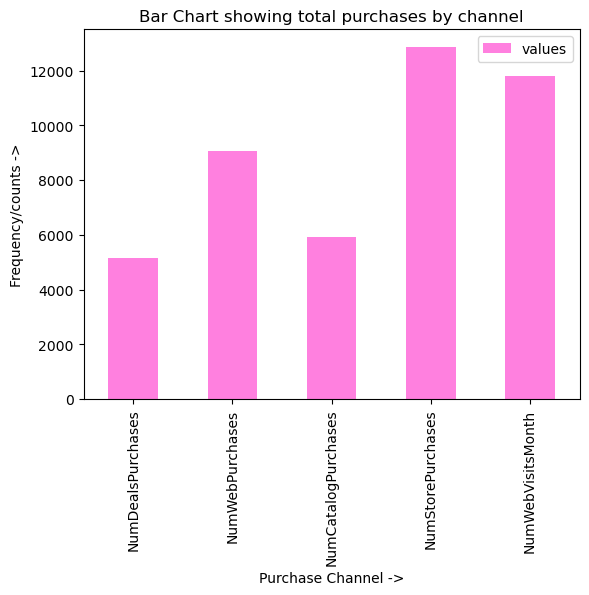

In [49]:
df2.plot(
    kind='bar',
    title='Bar Chart showing total purchases by channel',
    color='#ff80df'
)
plt.xlabel('Purchase Channel ->')
plt.ylabel('Frequency/counts ->')

### Store Purchase is preferred by most of the customers. And deals/ Discounts are less preferred by customers(Generally)
### We also noice that, Although people visits website, but less amount of people purchase from web

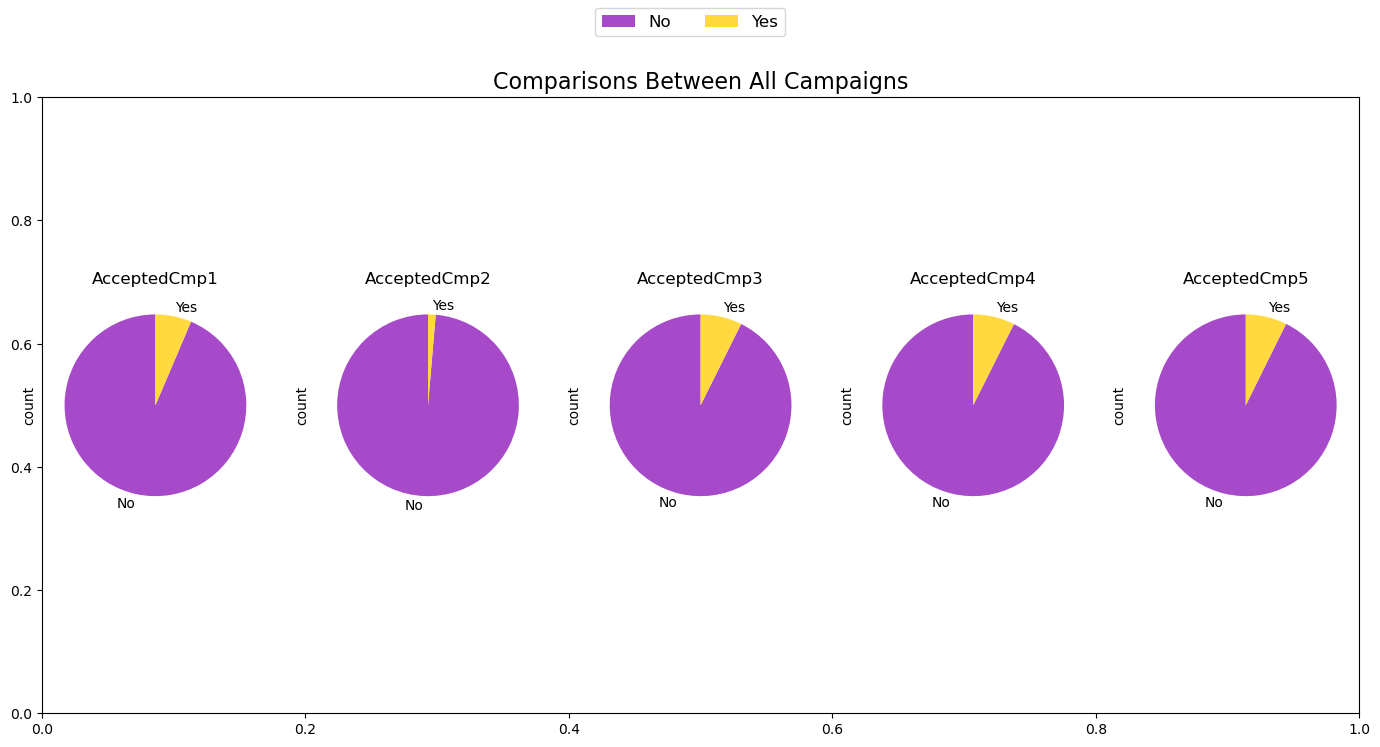

In [92]:
plt.figure(figsize=(17,8))
plt.title('Comparisons Between All Campaigns',fontsize=16)
labels=['No','Yes']
colors=['#A64AC9','#FFD93D']
for i in range(5):
    plt.subplot(1,5,i+1)
    k='AcceptedCmp'+str(i+1)
    df[k].value_counts().plot(
    kind='pie',
    labels=labels,
    colors=colors,
    startangle=90,
    )
    plt.title(k)
plt.gcf().legend(labels,loc='upper center',ncol=2,fontsize=12)
    
    

### Oh, No!!! The campeigns are not efected at all. Most of the customers have said a big NOOO to the Campeigns. Camp 2 performance is the worst. 

Text(0.5, 1.0, 'Customer Satisfaction Level')

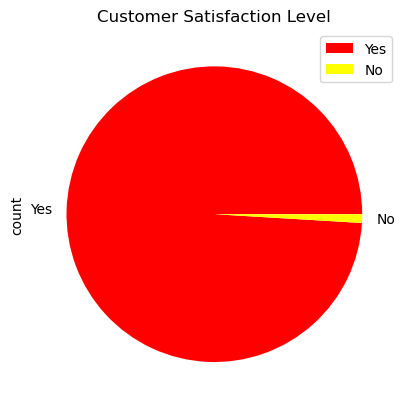

In [98]:
## Let's have a look to cutomers complain
labels=['Satisfied','Not Satisfied']
colors=['Red','yellow']
df['Complain'].value_counts().plot(
    kind='pie',
    labels=labels,
    legend=True,
    colors=colors
    
    
)
plt.title('Customer Satisfaction Level')

### So, Customers' complaint about the company product or their services are very very less. This is a Good Sign !!!

<Axes: title={'center': 'Total Number of Customers From Each Country'}, xlabel='Total customers', ylabel='Country'>

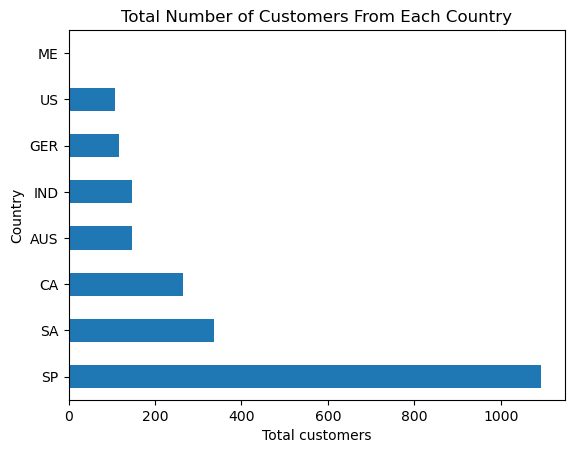

In [101]:
df['Country'].value_counts().plot(
    kind='barh',
    xlabel='Total customers',
    title='Total Number of Customers From Each Country'
)

In [5]:
df.to_csv('data.csv')